# **TUIA - Aprendizaje Automático 1 - 2024**

---

**Materia:** Aprendizaje Automático I (IA41)

**Año académico:** 2024

**Período lectivo:** 2° cuatrimestre

**Integrantes:**
- Britos, Julián Francisco
- Menescaldi, Brisa
- Rodriguez y Barros, Francisco 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/franciscoryb1/AA1-TUIA-RodriguezYBarros-Menescaldi-Britos/blob/main/TP.ipynb)

# Librerías

Python 3.11.6

numpy   1.26.2

pandas  2.2.2

matplotlib  3.8.2

plotly  5.21.0

scikit-learn    1.5.0

seaborn 0.13.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor,
    LogisticRegression
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
     mean_squared_error, 
     r2_score, 
     mean_absolute_error,
     classification_report, 
     confusion_matrix,
     ConfusionMatrixDisplay,
     balanced_accuracy_score, 
     log_loss,
     roc_curve, 
     roc_auc_score, 
     auc,
     accuracy_score
)

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

# Carga de datos

In [3]:
file_path = "house-prices-tp.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

**Características de entrada en orden:**

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

**Variable de salida (target):**

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


# Análisis estadístico descriptivo

## Exploración de los datos

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


In [5]:
# INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [6]:
# VALORES FALTANTES EN EL DATASET
df.isnull().sum()

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64

In [7]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualización de los datos

### Matriz de correlación

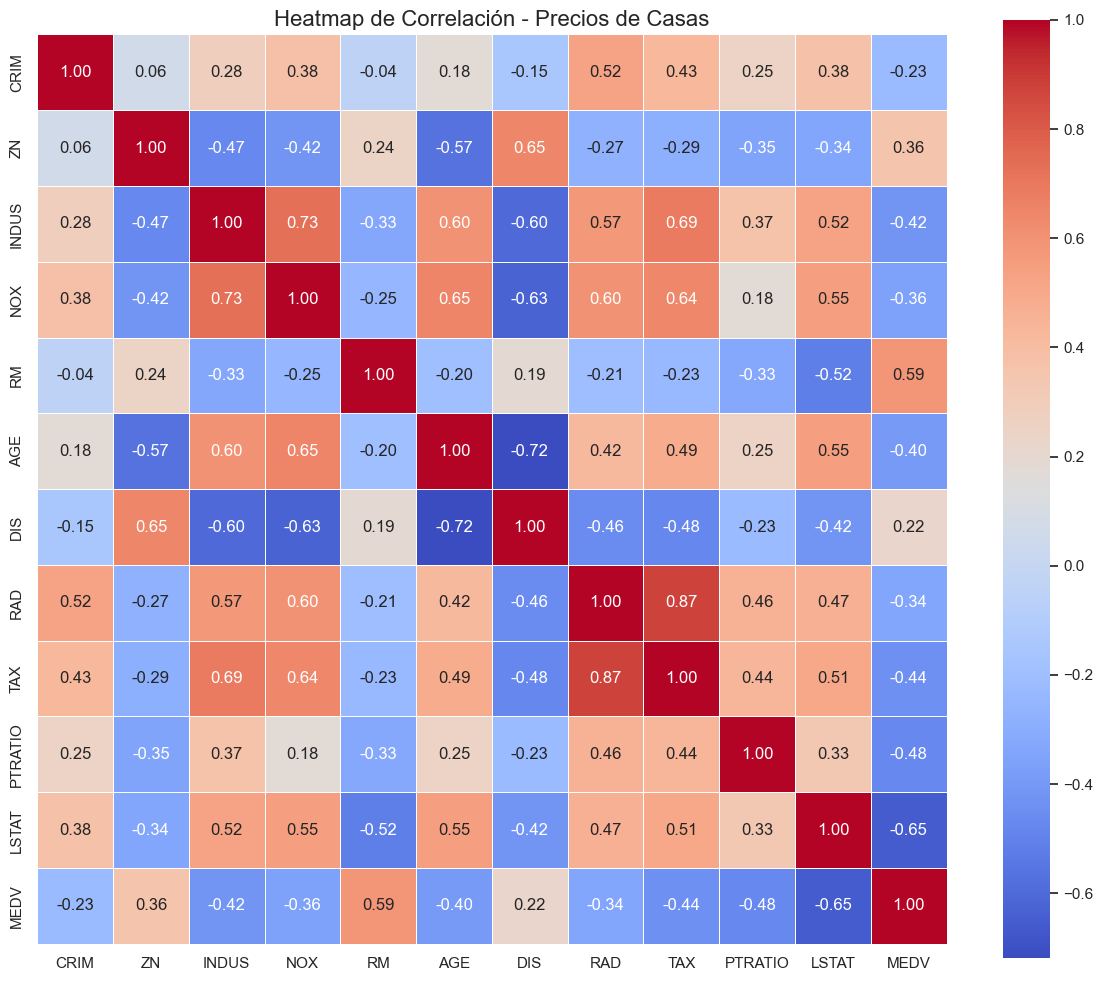

In [8]:
# Seleccionar algunas variables numéricas para el heatmap
variables = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df_subset = df[variables]

# Calcular la correlación entre las variables
correlation = df_subset.corr()

sns.set_theme()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)

# Configurar el título y los labels
plt.title('Heatmap de Correlación - Precios de Casas', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Análisis de correlaciones altas en el heatmap de precios de casas

##### Correlaciones altas identificadas (≥ 0.70):

1. **INDUS y NOX** (0.73):
   - Existe una fuerte correlación positiva entre la proporción de acres de negocios no minoristas por ciudad (INDUS) y la concentración de óxidos nítricos (NOX).
   - Esto sugiere que las áreas con mayor actividad industrial tienden a tener niveles más altos de contaminación por óxidos nítricos.

2. **AGE y DIS** (-0.72):
   - Hay una fuerte correlación negativa entre la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE) y la distancia ponderada a los cinco centros de empleo de Boston (DIS).
   - Esto indica que las viviendas más antiguas tienden a estar más cerca de los centros de empleo, mientras que las más nuevas están generalmente más alejadas.

3. **RAD y TAX** (0.87):
   - Se observa una correlación positiva muy fuerte entre el índice de accesibilidad a las autopistas radiales (RAD) y la tasa de impuesto a la propiedad por $10,000 (TAX).
   - Esto sugiere que las áreas con mejor acceso a las autopistas tienden a tener tasas de impuestos más altas, posiblemente debido a una mayor demanda o desarrollo en estas zonas.

##### Implicaciones:

- La fuerte relación entre la actividad industrial y la contaminación del aire podría ser relevante para políticas de zonificación y regulaciones ambientales.
- La correlación entre la edad de las viviendas y su proximidad a los centros de empleo puede influir en estrategias de desarrollo urbano y planificación de transporte.
- La asociación entre el acceso a autopistas y las tasas de impuestos podría ser considerada en la planificación fiscal y el desarrollo de infraestructuras.

##### Nota:

Estas correlaciones no implican necesariamente causalidad, pero proporcionan insights valiosos sobre las relaciones entre diferentes características del mercado inmobiliario y factores urbanos en el área de Boston.

### CRIM

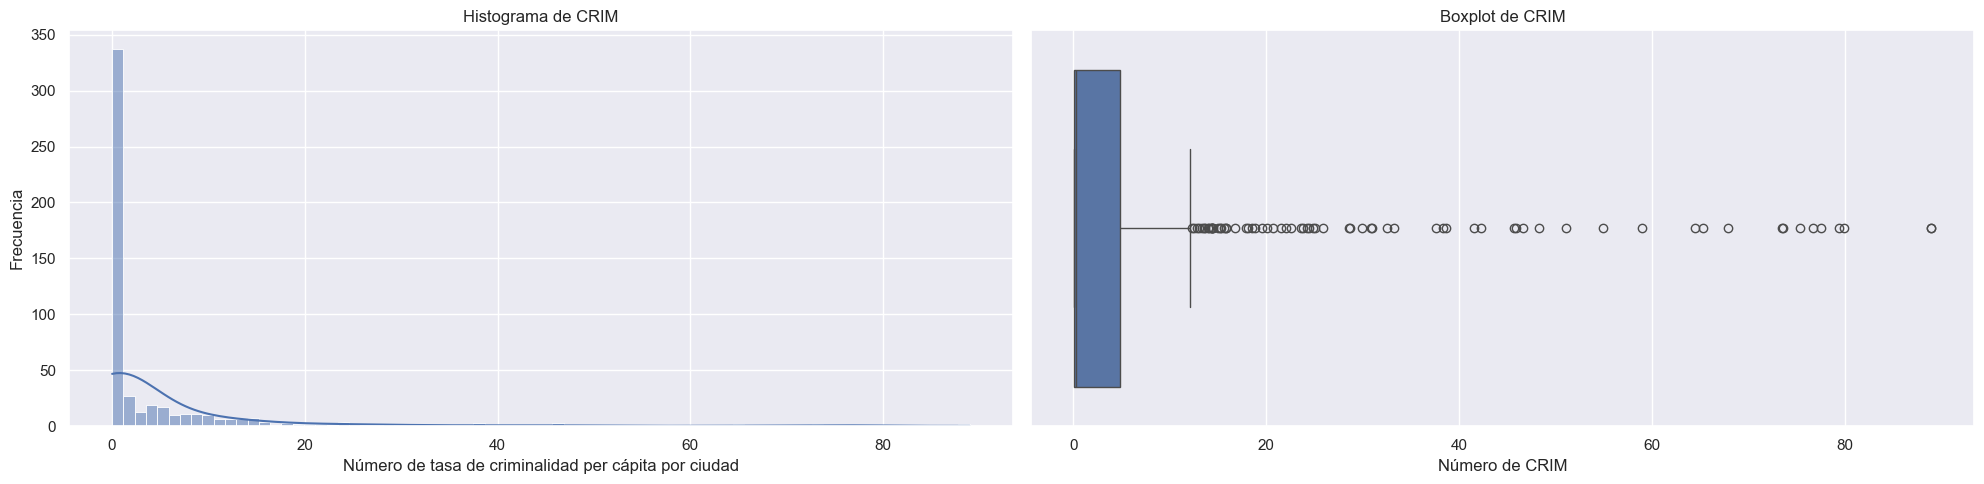

count    533.000000
mean       5.845517
std       13.828631
min        0.006320
25%        0.084470
50%        0.315330
75%        4.871410
max       88.976200
Name: CRIM, dtype: float64

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['CRIM'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de CRIM')
axs[0].set_xlabel('Número de tasa de criminalidad per cápita por ciudad')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['CRIM'].quantile(0.25)
q2 = df['CRIM'].quantile(0.5)
q3 = df['CRIM'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['CRIM'], ax=axs[1])
axs[1].set_title('Boxplot de CRIM')
axs[1].set_xlabel('Número de CRIM')

plt.tight_layout()
plt.show()

df['CRIM'].describe()

### ZN

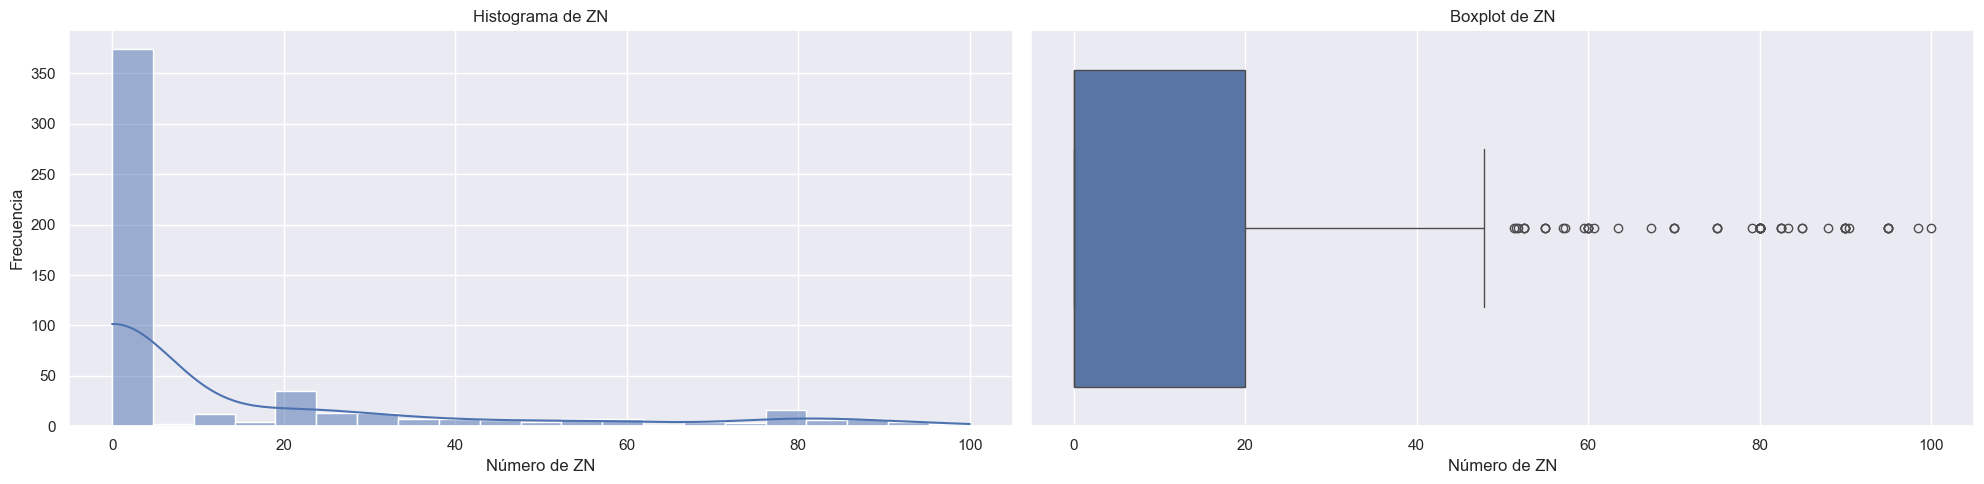

count    534.000000
mean      13.197175
std       24.902981
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['ZN'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de ZN')
axs[0].set_xlabel('Número de ZN')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['ZN'].quantile(0.25)
q2 = df['ZN'].quantile(0.5)
q3 = df['ZN'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['ZN'], ax=axs[1])
axs[1].set_title('Boxplot de ZN')
axs[1].set_xlabel('Número de ZN')

plt.tight_layout()
plt.show()

df['ZN'].describe()

### INDUS y NOX

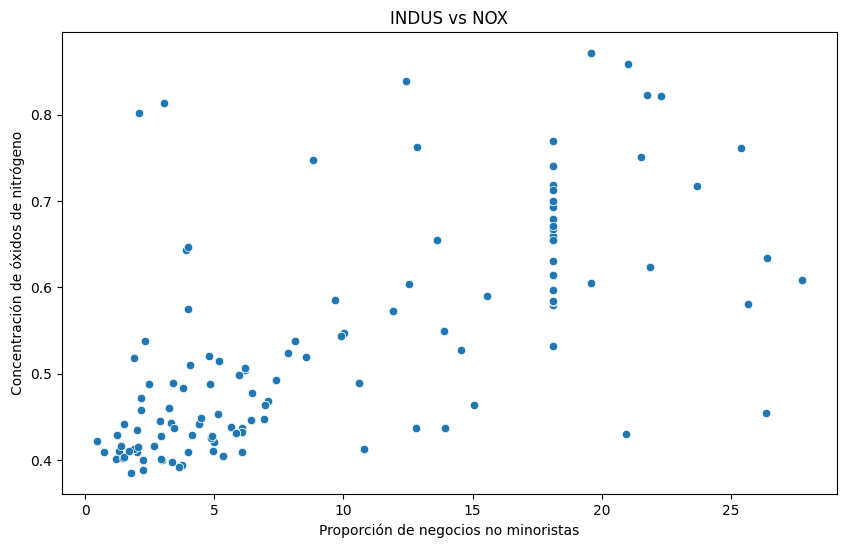

In [3]:
# Gráfico de dispersión 2D para INDUS vs NOX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='INDUS', y='NOX')
plt.title('INDUS vs NOX')
plt.xlabel('Proporción de negocios no minoristas')
plt.ylabel('Concentración de óxidos de nitrógeno')
plt.show()

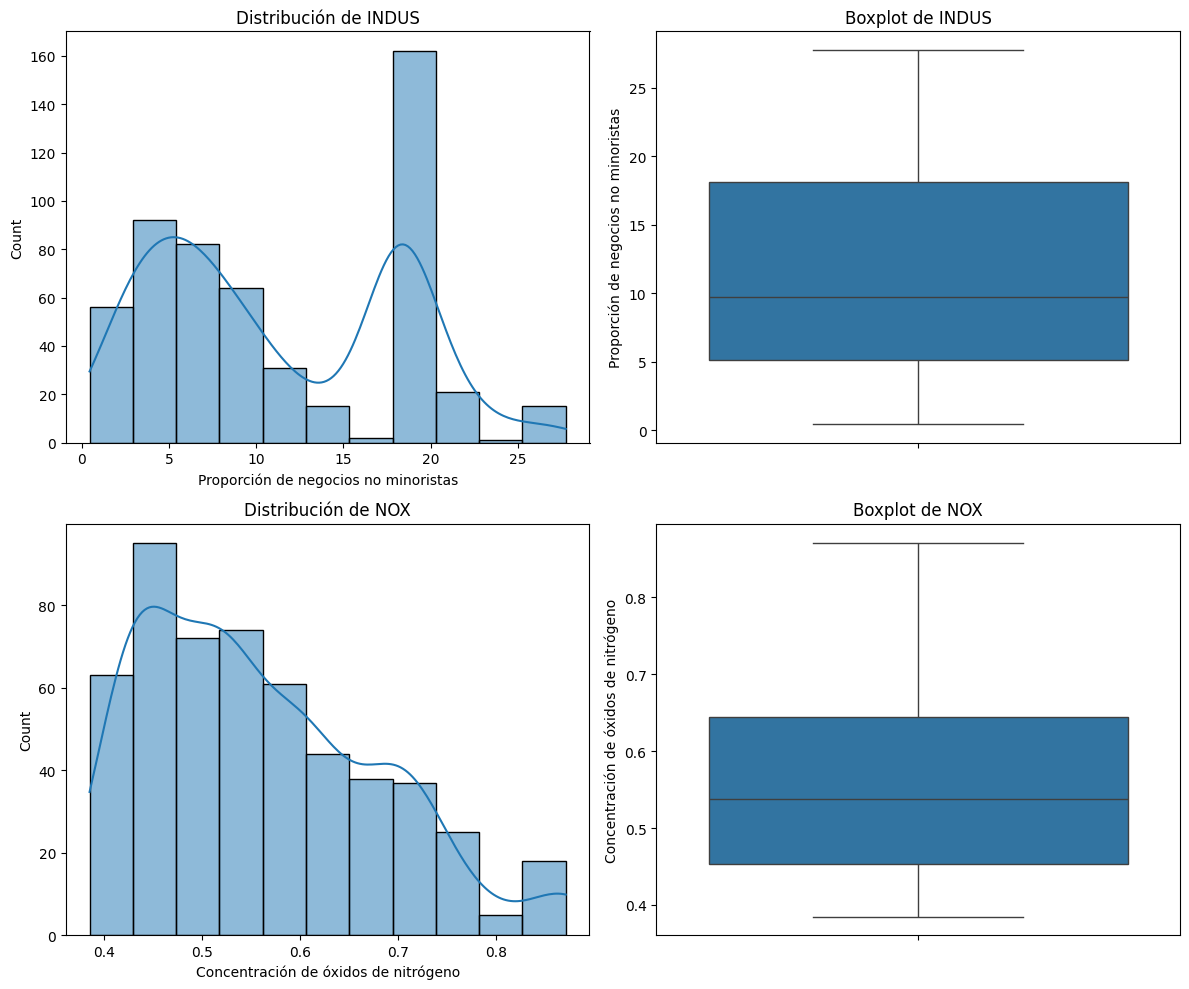

In [4]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(12, 10))

# Histograma de INDUS
plt.subplot(2, 2, 1)
sns.histplot(df['INDUS'], kde=True)
plt.title('Distribución de INDUS')
plt.xlabel('Proporción de negocios no minoristas')

# Boxplot de INDUS
plt.subplot(2, 2, 2)
sns.boxplot(y=df['INDUS'])
plt.title('Boxplot de INDUS')
plt.ylabel('Proporción de negocios no minoristas')

# Histograma de NOX
plt.subplot(2, 2, 3)
sns.histplot(df['NOX'], kde=True)
plt.title('Distribución de NOX')
plt.xlabel('Concentración de óxidos de nitrógeno')

# Boxplot de NOX
plt.subplot(2, 2, 4)
sns.boxplot(y=df['NOX'])
plt.title('Boxplot de NOX')
plt.ylabel('Concentración de óxidos de nitrógeno')

plt.tight_layout()
plt.show()

In [5]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='INDUS', y='NOX', z='MEDV', color='MEDV',
                    title='Relación entre INDUS, NOX contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'INDUS': 'Negocios no minoristas',
                            'NOX': 'Concentración de óxidos de nitrógeno'})
fig.show()

### CHAS

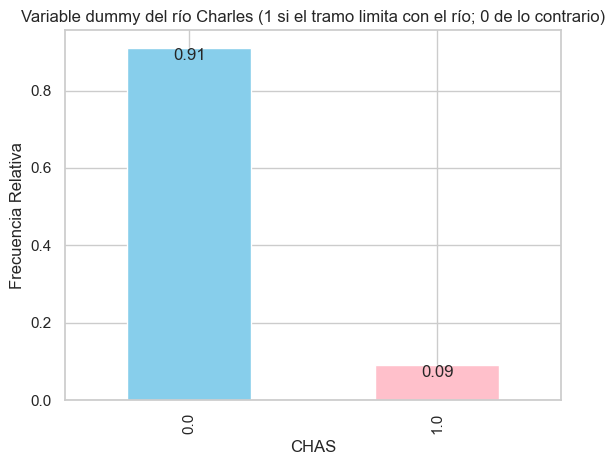

In [18]:
# GRÁFICO PARA VISUALIZAR EL BALANCE DE 'RainTomorrow'
rel_freq = df['CHAS'].value_counts(normalize=True)

grafico = rel_freq.plot(kind='bar', color=['skyblue', 'pink'])

plt.title('Variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)')
plt.ylabel('Frecuencia Relativa')

for index, value in enumerate(rel_freq):
    plt.text(index, value, f'{value:.2f}', ha='center', va='top')

plt.show()

### RM

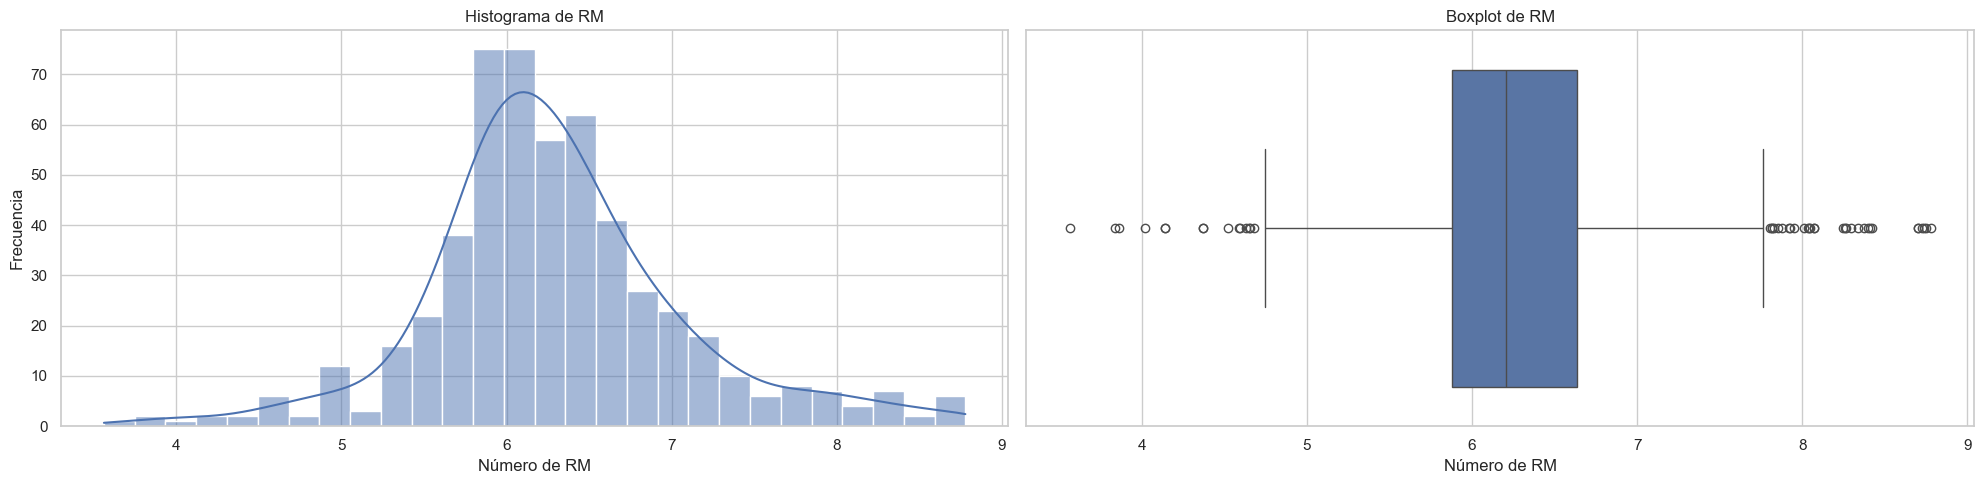

count    535.000000
mean       6.291839
std        0.782403
min        3.561000
25%        5.875500
50%        6.208000
75%        6.638500
max        8.780000
Name: RM, dtype: float64

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['RM'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de RM')
axs[0].set_xlabel('Número de RM')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['RM'].quantile(0.25)
q2 = df['RM'].quantile(0.5)
q3 = df['RM'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['RM'], ax=axs[1])
axs[1].set_title('Boxplot de RM')
axs[1].set_xlabel('Número de RM')

plt.tight_layout()
plt.show()

df['RM'].describe()

### AGE y DIS

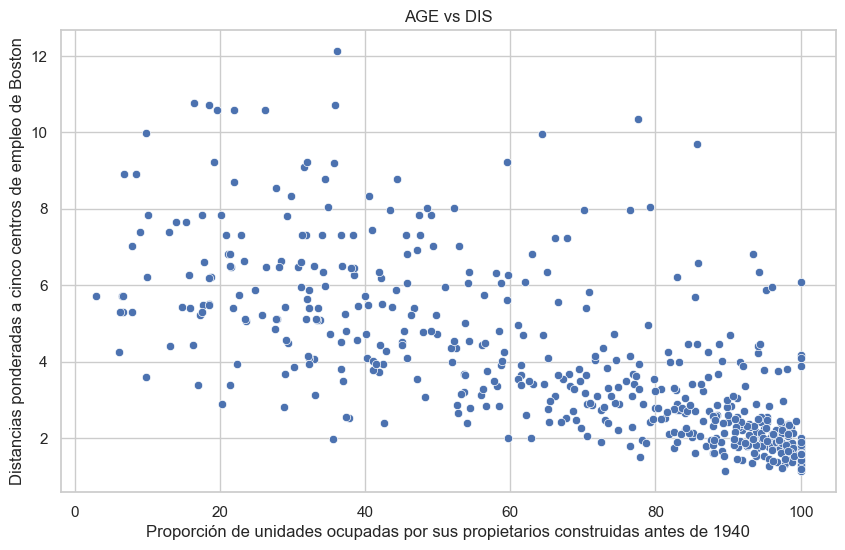

In [23]:
# Gráfico de dispersión 2D para INDUS vs NOX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AGE', y='DIS')
plt.title('AGE vs DIS')
plt.xlabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')
plt.ylabel('Distancias ponderadas a cinco centros de empleo de Boston')
plt.show()

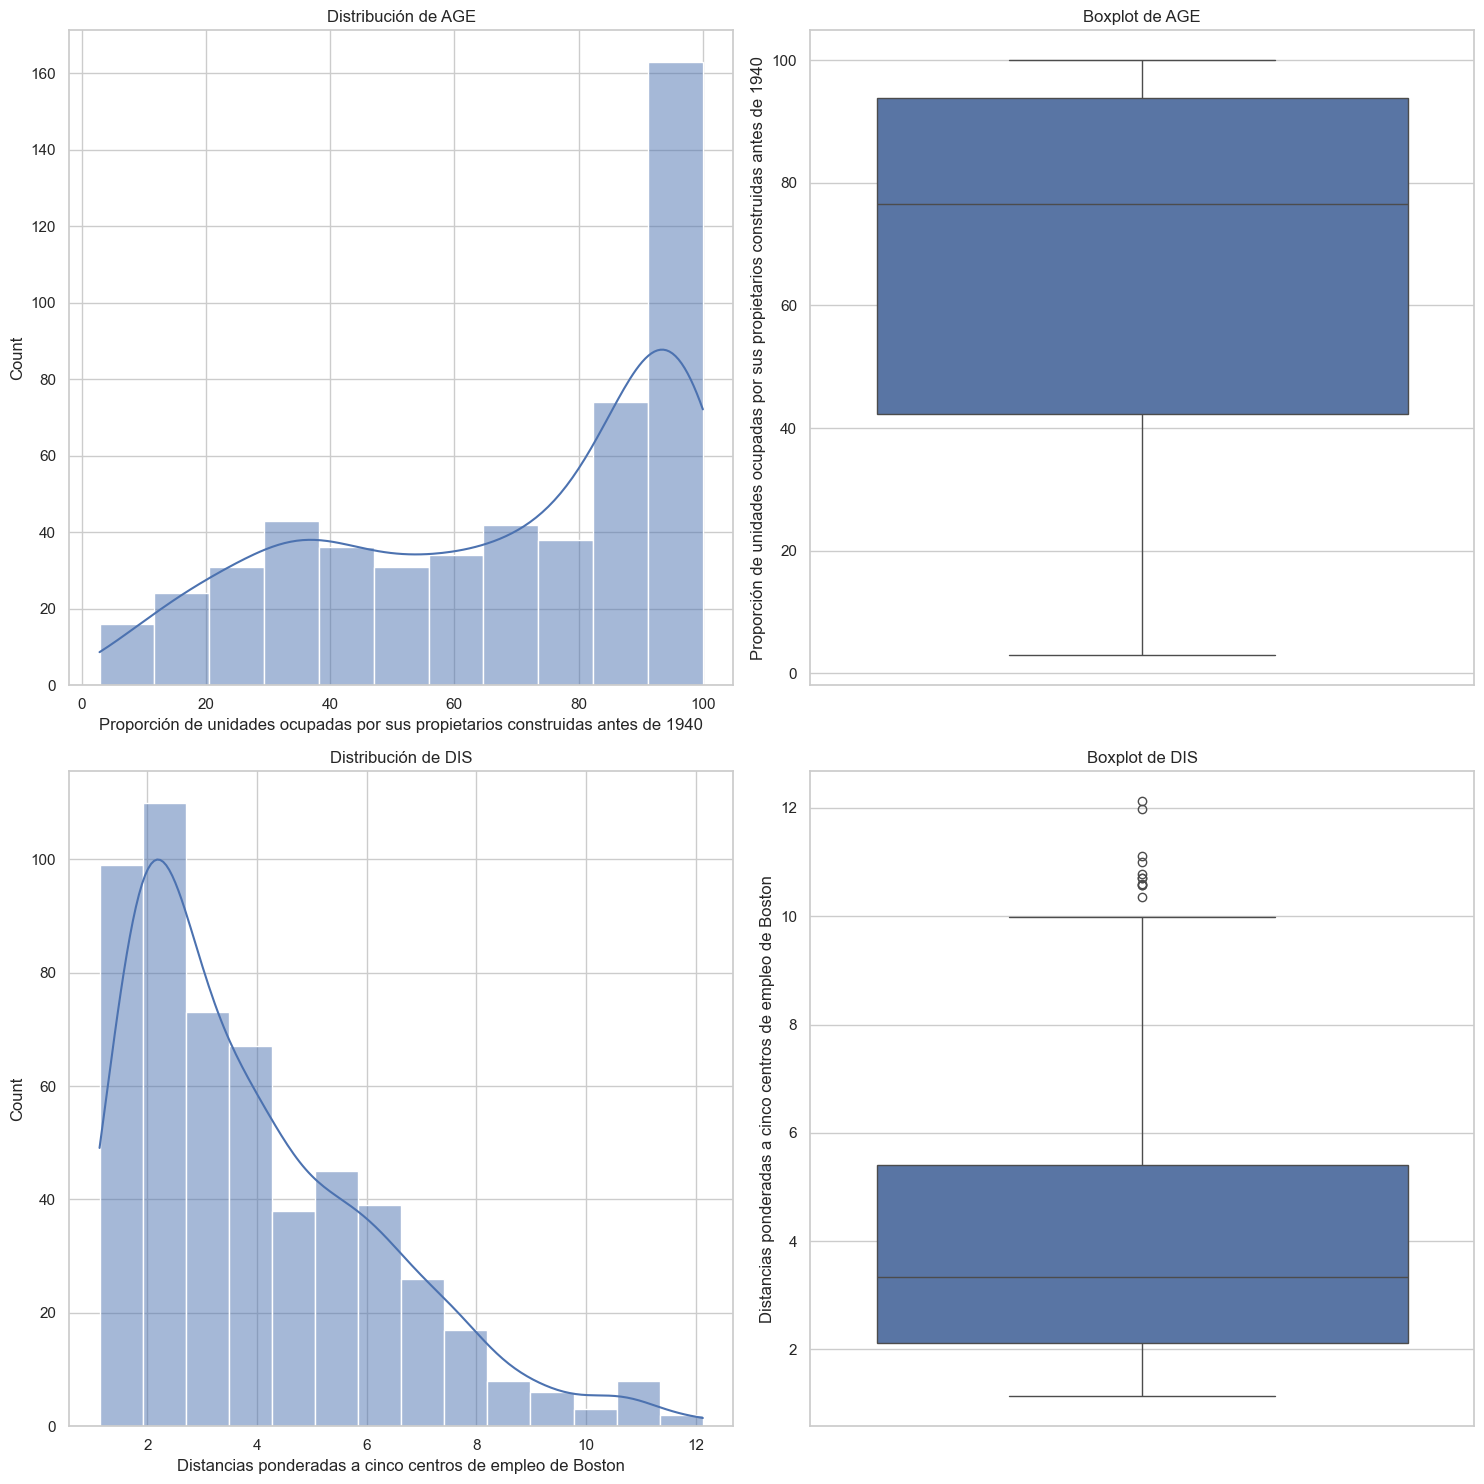

In [27]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(15, 15))

# Histograma de AGE
plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], kde=True)
plt.title('Distribución de AGE')
plt.xlabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')

# Boxplot de AGE
plt.subplot(2, 2, 2)
sns.boxplot(y=df['AGE'])
plt.title('Boxplot de AGE')
plt.ylabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')

# Histograma de DIS
plt.subplot(2, 2, 3)
sns.histplot(df['DIS'], kde=True)
plt.title('Distribución de DIS')
plt.xlabel('Distancias ponderadas a cinco centros de empleo de Boston')

# Boxplot de DIS
plt.subplot(2, 2, 4)
sns.boxplot(y=df['DIS'])
plt.title('Boxplot de DIS')
plt.ylabel('Distancias ponderadas a cinco centros de empleo de Boston')

plt.tight_layout()
plt.show()

In [29]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='AGE', y='DIS', z='MEDV', color='MEDV',
                    title='Relación entre AGE, DIS contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'AGE': 'AGE',
                            'DIS': 'DIS'})
fig.show()

### RAD y TAX

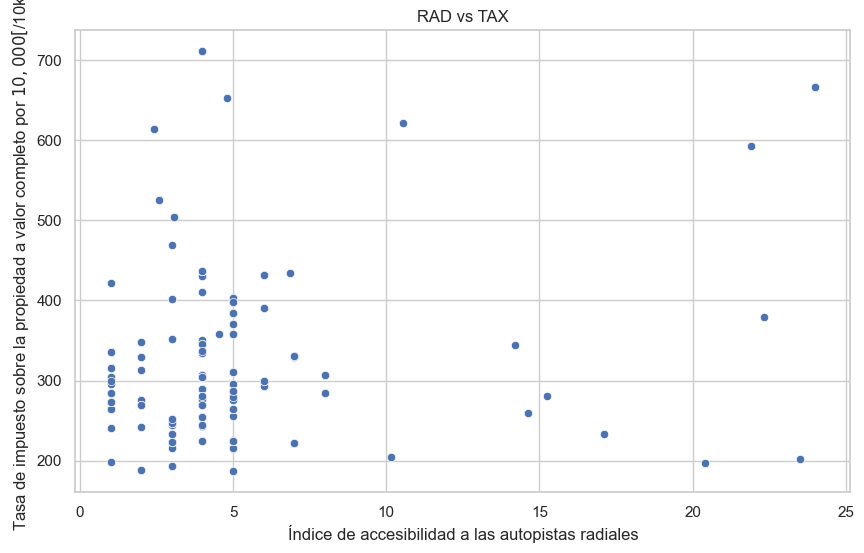

In [37]:
# Gráfico de dispersión 2D para INDUS vs NOX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAD', y='TAX')
plt.title('RAD vs TAX')
plt.xlabel('Índice de accesibilidad a las autopistas radiales')
plt.ylabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')
plt.show()

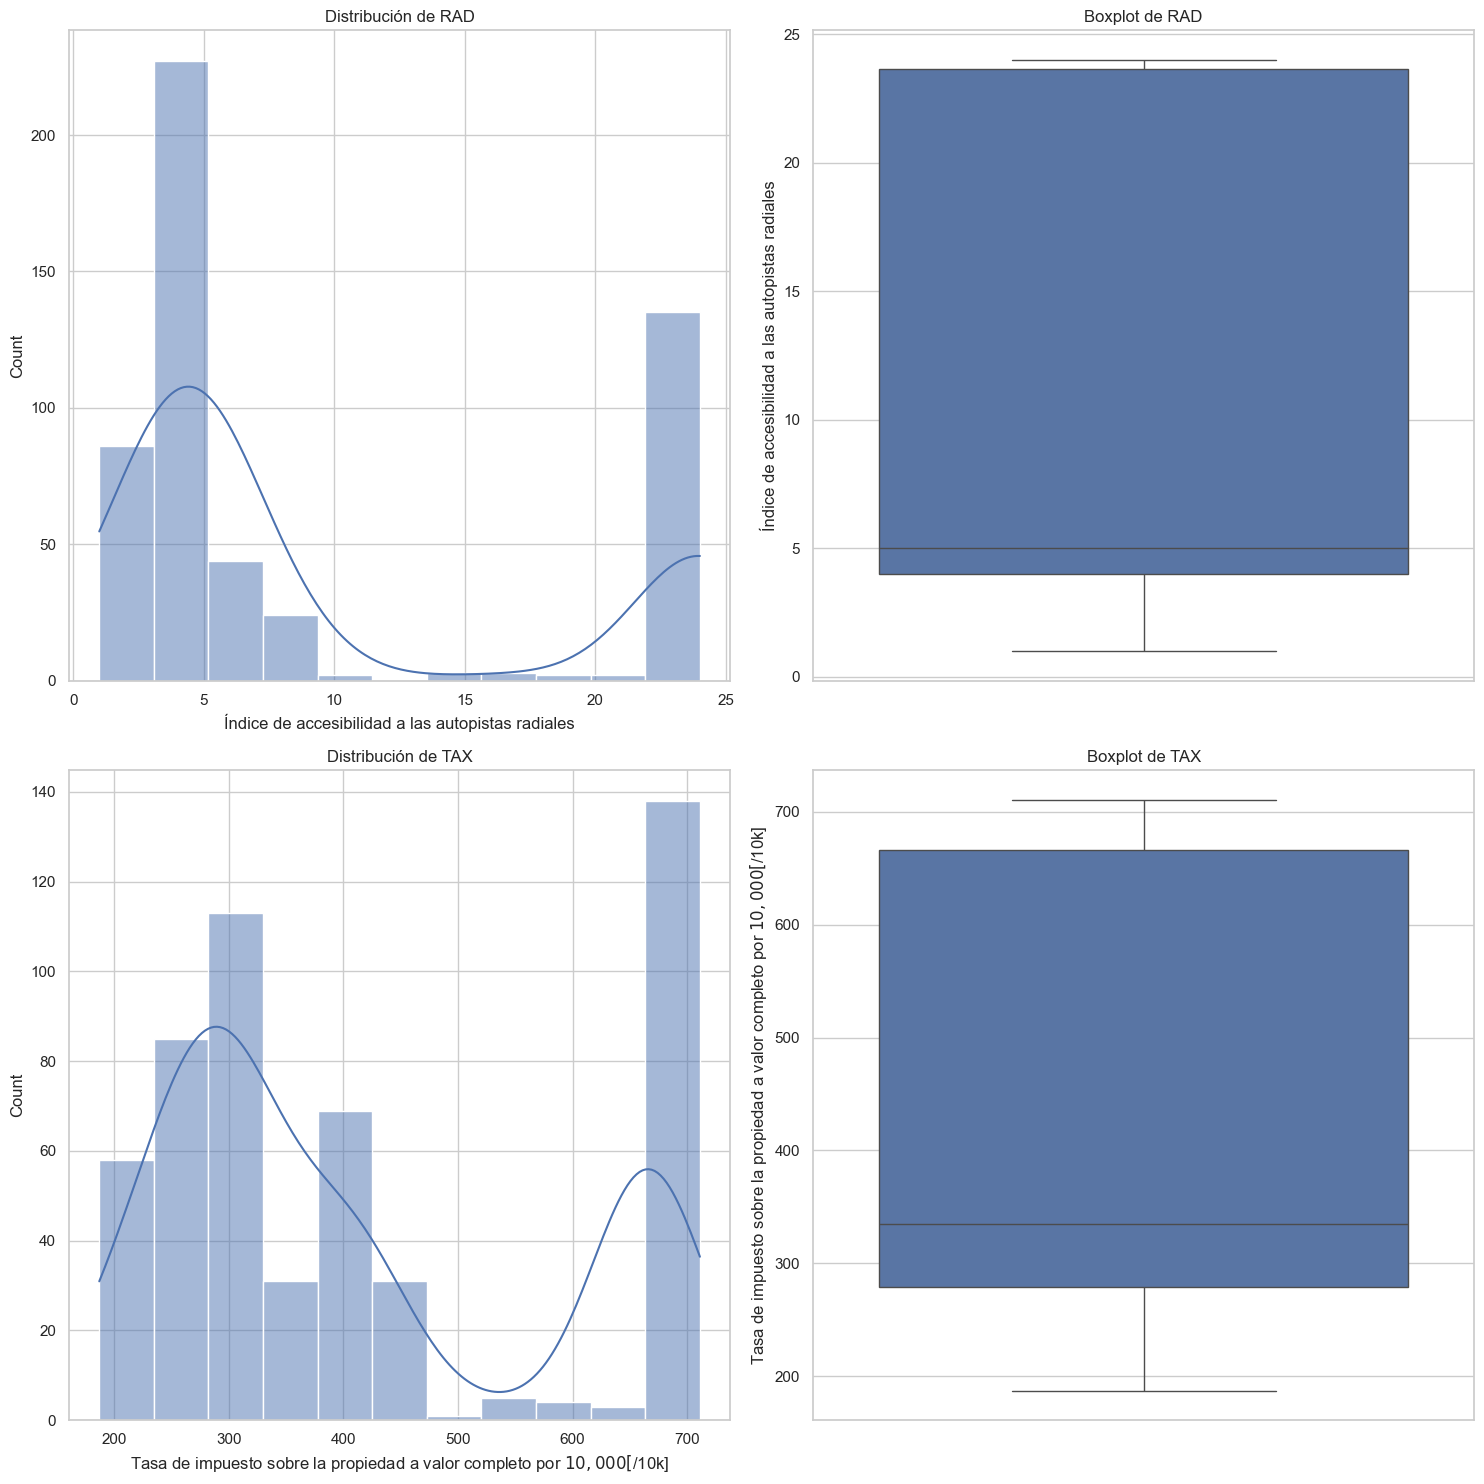

In [38]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(15, 15))

# Histograma de AGE
plt.subplot(2, 2, 1)
sns.histplot(df['RAD'], kde=True)
plt.title('Distribución de RAD')
plt.xlabel('Índice de accesibilidad a las autopistas radiales')

# Boxplot de AGE
plt.subplot(2, 2, 2)
sns.boxplot(y=df['RAD'])
plt.title('Boxplot de RAD')
plt.ylabel('Índice de accesibilidad a las autopistas radiales')

# Histograma de DIS
plt.subplot(2, 2, 3)
sns.histplot(df['TAX'], kde=True)
plt.title('Distribución de TAX')
plt.xlabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')

# Boxplot de DIS
plt.subplot(2, 2, 4)
sns.boxplot(y=df['TAX'])
plt.title('Boxplot de TAX')
plt.ylabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')

plt.tight_layout()
plt.show()

In [30]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='RAD', y='TAX', z='MEDV', color='MEDV',
                    title='Relación entre RAD, TAX contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'RAD': 'RAD',
                            'TAX': 'TAX'})
fig.show()

### PTRATIO

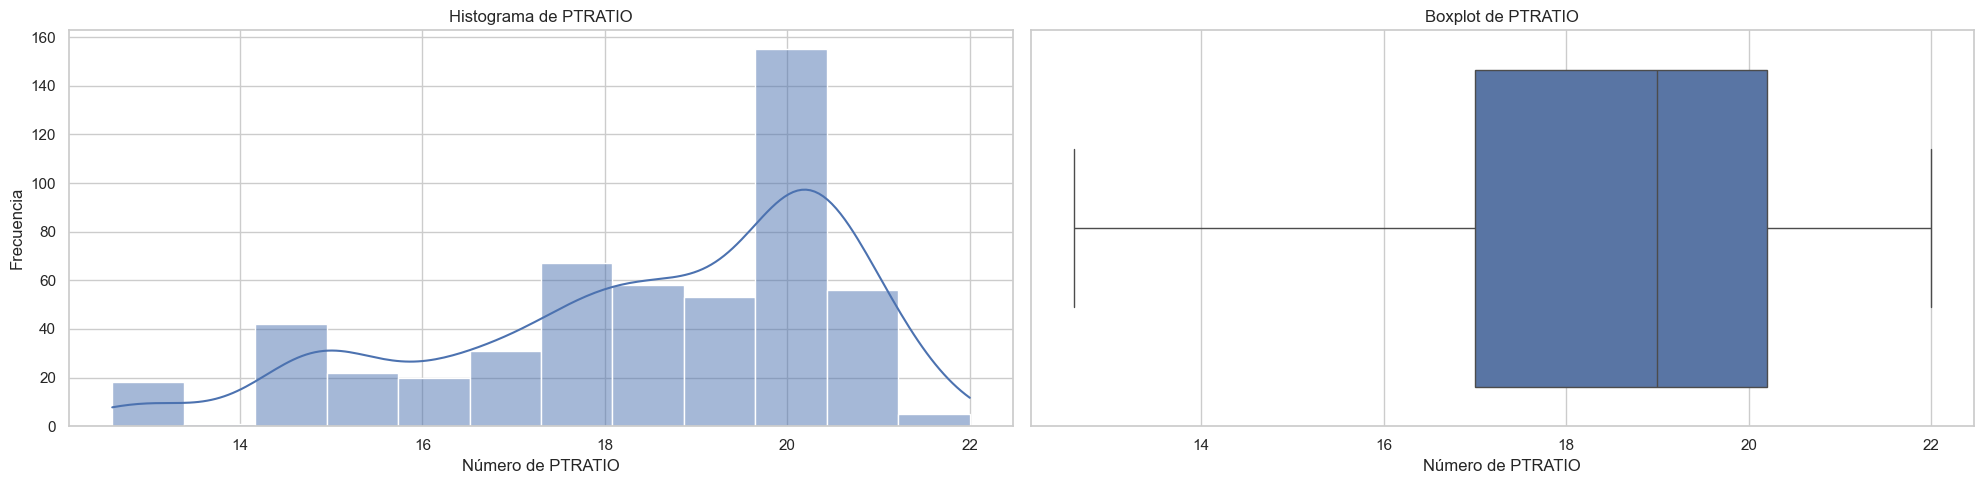

count    528.000000
mean      18.429904
std        2.194759
min       12.600000
25%       17.000000
50%       19.000000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['PTRATIO'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de PTRATIO')
axs[0].set_xlabel('Número de PTRATIO')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['PTRATIO'], ax=axs[1])
axs[1].set_title('Boxplot de PTRATIO')
axs[1].set_xlabel('Número de PTRATIO')

plt.tight_layout()
plt.show()

df['PTRATIO'].describe()

### B

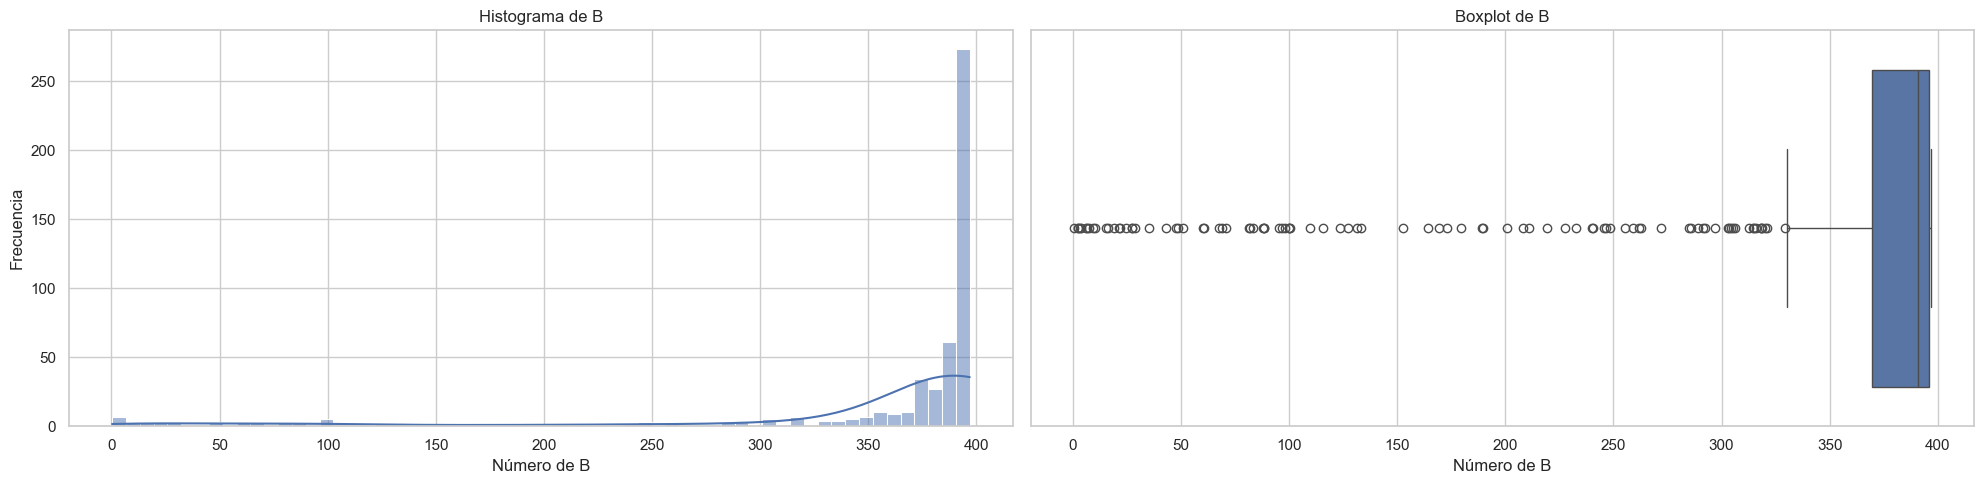

count    534.000000
mean     347.806040
std       99.636208
min        0.320000
25%      369.530000
50%      390.815000
75%      395.890000
max      396.900000
Name: B, dtype: float64

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['B'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de B')
axs[0].set_xlabel('Número de B')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['B'], ax=axs[1])
axs[1].set_title('Boxplot de B')
axs[1].set_xlabel('Número de B')

plt.tight_layout()
plt.show()

df['B'].describe()

B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

### LSTAT

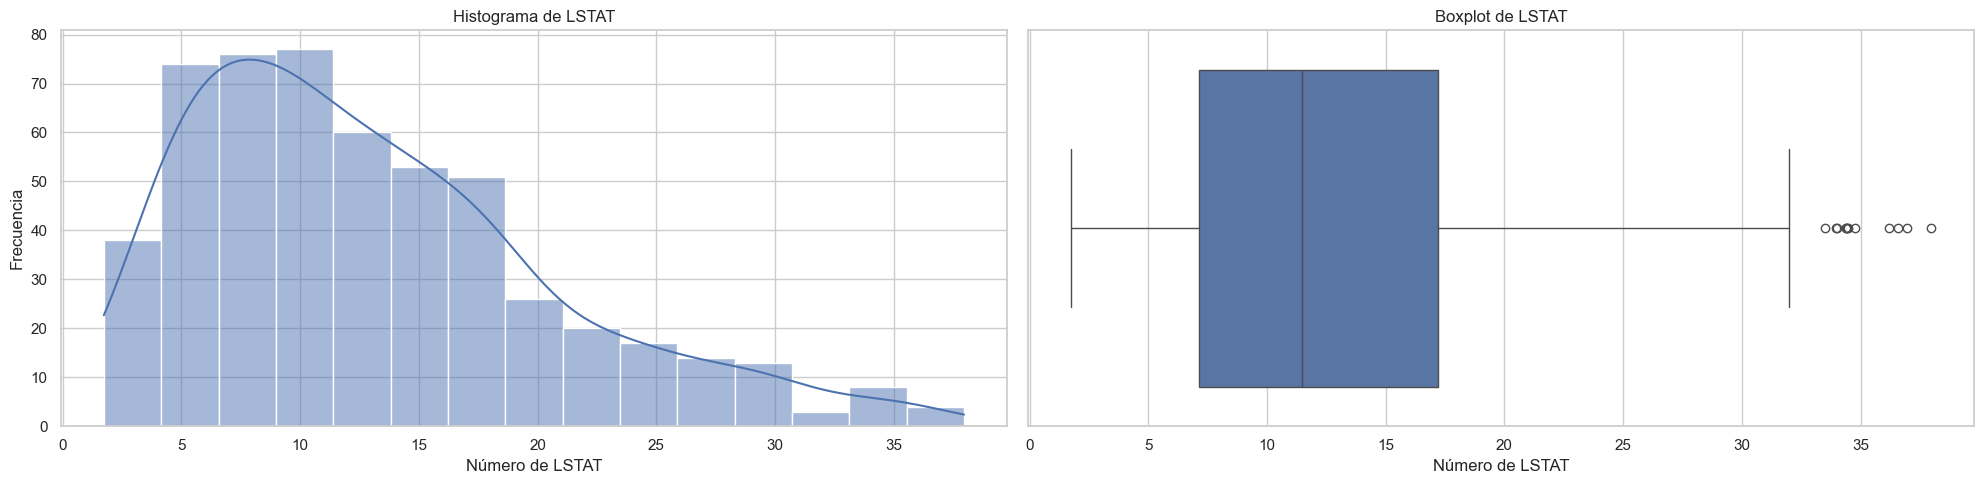

count    534.000000
mean      13.028092
std        7.579972
min        1.730000
25%        7.150000
50%       11.465000
75%       17.205000
max       37.970000
Name: LSTAT, dtype: float64

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['LSTAT'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de LSTAT')
axs[0].set_xlabel('Número de LSTAT')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['LSTAT'], ax=axs[1])
axs[1].set_title('Boxplot de LSTAT')
axs[1].set_xlabel('Número de LSTAT')

plt.tight_layout()
plt.show()

df['LSTAT'].describe()

13) LSTAT: % de población de menor estatus socioeconómico

### MEDV

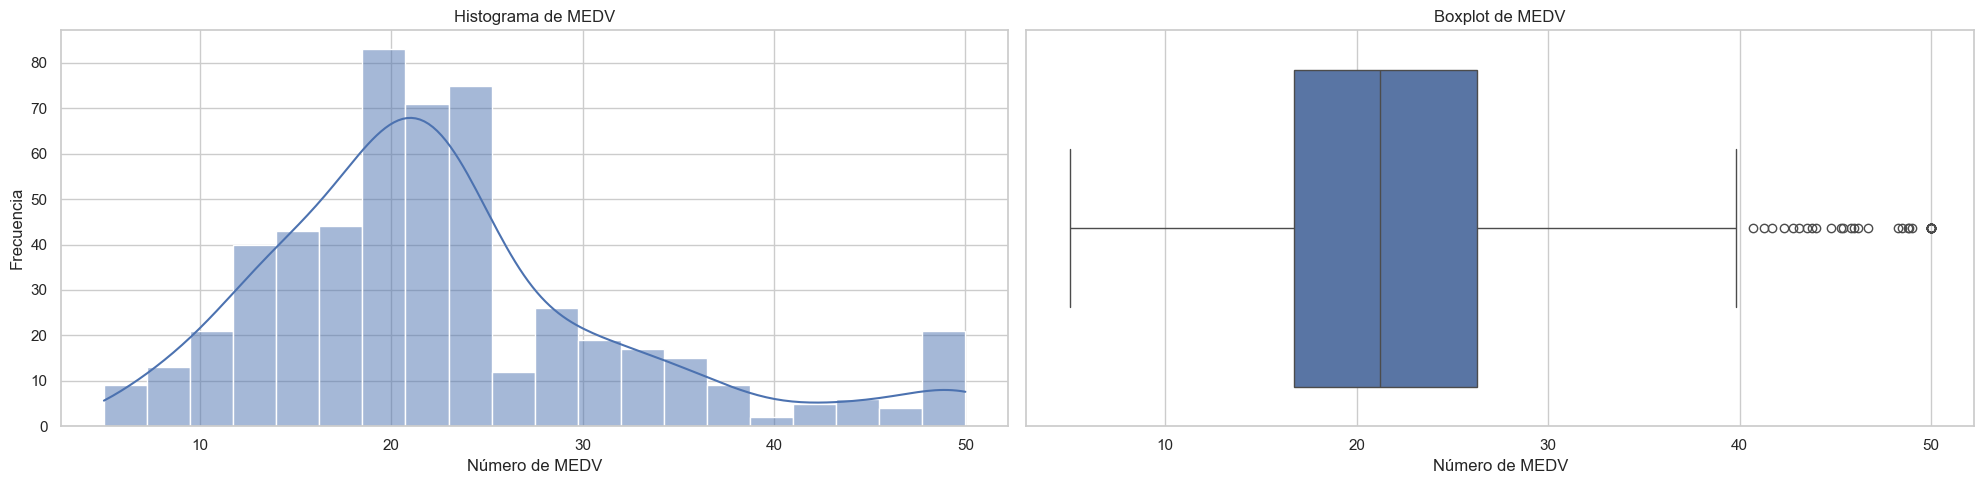

count    535.000000
mean      22.746809
std        9.491452
min        5.000000
25%       16.750000
50%       21.200000
75%       26.300000
max       50.000000
Name: MEDV, dtype: float64

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['MEDV'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MEDV')
axs[0].set_xlabel('Número de MEDV')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['MEDV'], ax=axs[1])
axs[1].set_title('Boxplot de MEDV')
axs[1].set_xlabel('Número de MEDV')

plt.tight_layout()
plt.show()

df['MEDV'].describe()

# Split de datos

In [45]:
X = df.drop(columns=['MEDV'])
y = df["MEDV"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Datos faltantes

## Eliminación de datos faltantes de Train

Verificamos si existen filas que contengan solo valores nulos.

In [49]:
# Contamos el número total de filas que tengan todos sus valores como nulos en train
X_train.isnull().all(axis=1).sum()

1

Vemos que si tiene una fila donde todos sus valores son nulos, así que la eliminamos.

In [50]:
X_train = X_train.dropna(how='all')

Verificamos que se haya borrado correctamente y que no queden filas que contengan todos sus valores nulos.

In [51]:
# Contamos el número total de filas que tengan todos sus valores como nulos en train
X_train.isnull().all(axis=1).sum()

0

## Eliminación de datos faltantes de Test

Verificamos si existen filas que contengan solo valores nulos.

In [52]:
# Contamos el número total de filas que tengan todos sus valores como nulos en train
X_test.isnull().all(axis=1).sum()

0

Vemos que no tiene una fila donde todos sus valores son nulos, así que hace falta realizar ninguna acción.

## Completado de datos

El ser todos los datos continuos usaremos la mediana para rellenar los datos faltantes, ya que la mediana es una medida de tendencia central que no se ve afectada por los valores extremos o atípicos que podrían sesgar y distorsionar mis resultados.


### Completado de datos de Train

In [53]:
X_train.isnull().sum()

CRIM       18
ZN         17
INDUS      11
CHAS       19
NOX        20
RM         16
AGE        21
DIS        13
RAD        25
TAX        12
PTRATIO    21
B          17
LSTAT      17
dtype: int64

Rellenamos los datos faltantes con la mediana.

In [54]:
X_train = X_train.fillna(X_train.median())

Verificamos que se hayan rellenado los valores faltantes con la mediana correctamente y que no queden valores nulos.

In [55]:
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Completado de datos de Test

In [56]:
X_test.isnull().sum()

CRIM       4
ZN         4
INDUS      3
CHAS       3
NOX        3
RM         4
AGE        2
DIS        1
RAD        2
TAX        5
PTRATIO    6
B          4
LSTAT      4
dtype: int64

Rellenamos los datos faltantes con la mediana.

In [57]:
X_test = X_test.fillna(X_test.median())

Verificamos que se hayan rellenado los valores faltantes con la mediana correctamente y que no queden valores nulos.

In [58]:
X_test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Estandarización

Estandarizamos las características porque pueden tener diferentes rangos de valores.
Estandarizarlas asegura que todas las características tengan la misma escala, lo que evita que las características
con mayores rangos dominen el modelo. 

In [59]:
# Crear el estandarizador
scaler = StandardScaler()

## Estandarización de Train

In [60]:
X_train_scaled = scaler.fit_transform(X_train)

## Estandarización de Test

In [61]:
X_test_scaled = scaler.transform(X_test)